In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

from sklearn import preprocessing, cluster
import scipy
import math
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

In [2]:
df = pd.read_csv("EmployeeSchedule_ABC.CSV")

# EDA

In [3]:
df.head()

,Emp ID,Office InTime,Office OutTime,Area,Area Lat,Area Long
0,1,13:00:00,22:00:00,CHANDIVALI,19.107491,72.901760
1,2,13:00:00,22:00:00,ANDHERI (E),19.115491,72.872695
2,3,13:00:00,22:00:00,BANDRA (E),19.060516,72.850432
3,4,13:00:00,22:00:00,BANDRA (E),19.060516,72.850432
4,6,13:00:00,22:00:00,DAHISAR (E),19.253933,72.867245


In [4]:
df.shape

(1688, 6)

In [5]:
df.isnull().sum() # No null values

Emp ID            0
Office InTime     0
Office OutTime    0
Area              0
Area Lat          0
Area Long         0
dtype: int64

In [6]:
df.describe()

,Emp ID,Area Lat,Area Long
count,1688.000000,1688.000000,1688.000000
mean,1004.023697,19.161223,72.902289
std,576.245357,0.097832,0.062302
min,1.000000,18.906703,72.809430
25%,513.750000,19.091182,72.854292
50%,1016.500000,19.156511,72.872695
75%,1453.250000,19.244474,72.978535
max,2025.000000,19.394211,73.048291


In [7]:
df.nunique()

Emp ID            1688
Office InTime        8
Office OutTime       9
Area               118
Area Lat           111
Area Long          107
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp ID          1688 non-null   int64  
 1   Office InTime   1688 non-null   object 
 2   Office OutTime  1688 non-null   object 
 3   Area            1688 non-null   object 
 4   Area Lat        1688 non-null   float64
 5   Area Long       1688 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 79.2+ KB


In [9]:
df["Office InTime"].value_counts()

6:00:00     586
18:00:00    422
19:00:00    282
13:00:00    204
9:00:00     102
21:00:00     46
15:00:00     42
11:00:00      4
Name: Office InTime, dtype: int64

In [10]:
df["Office OutTime"].value_counts()

15:00:00    585
3:00:00     386
4:00:00     318
22:00:00    204
18:00:00    102
6:00:00      46
0:00:00      42
20:00:00      4
16:00:00      1
Name: Office OutTime, dtype: int64

<AxesSubplot:title={'center':'Office OutTime'}>

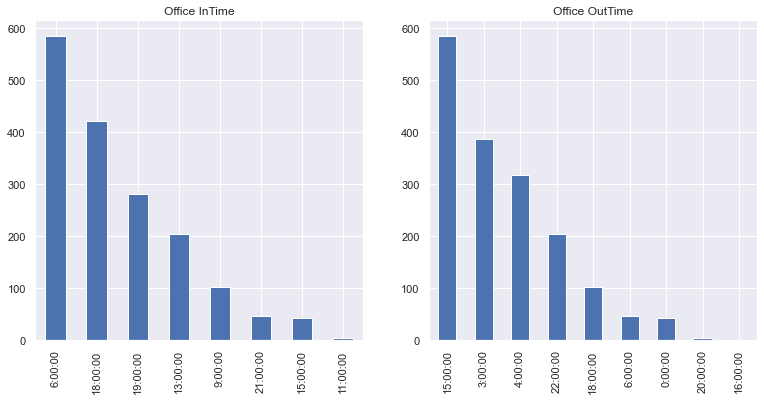

In [11]:
plt.subplot(331)
df['Office InTime'].value_counts(normalize=False).plot.bar(figsize=(20,20), title= 'Office InTime')

plt.subplot(332)
df['Office OutTime'].value_counts(normalize=False).plot.bar(title= 'Office OutTime')

In [12]:
df["Area"].value_counts()

THANE (W)        141
ANDHERI (E)      103
MIRA ROAD         92
AIROLI            68
KOPARKHAIRANE     63
                ... 
NAIGAON DADAR      1
GAMDEVI            1
CURRY ROAD         1
LALBAUG            1
NAIGOAN (W)        1
Name: Area, Length: 118, dtype: int64

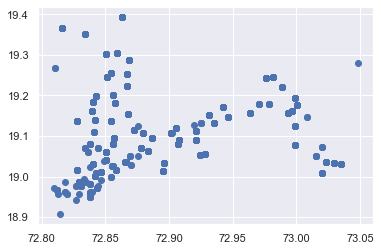

In [13]:
# Scatter plot for lat long
plt.scatter(x=df['Area Long'], y=df['Area Lat'])
plt.show()

In [14]:
# Scatter plot on area map
BBox = (df['Area Long'].min(),   df['Area Long'].max(),      
         df['Area Lat'].min(), df['Area Lat'].max())

In [15]:
BBox

(72.80943, 73.0482912, 18.9067031, 19.394211399999996)

In [16]:
plt_map = plt.imread('map.png')

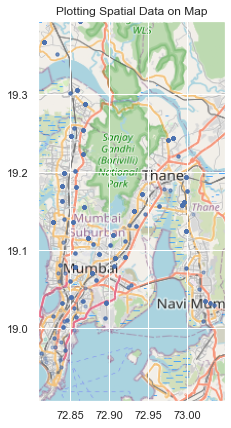

In [17]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df['Area Long'], df['Area Lat'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(plt_map, zorder=0, extent = BBox, aspect= 'equal')

# Clustering- K means
### We are now going to find how many clusters these data points can fit into and what are their centroids

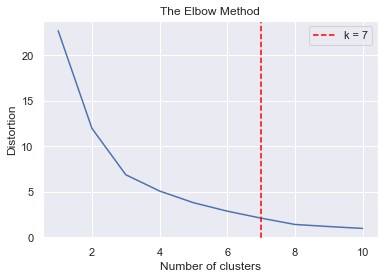

In [18]:
X = df[["Area Lat","Area Long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [19]:
# K = 7 shows the optimum no of clusters is 7 here. Using elbow method.

In [20]:
# We can try with k = 7 so that the K-Means algorithm will find 7 theoretical centroids.

k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = df[["Area Lat","Area Long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
df[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
df.sample(10)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Emp ID,Office InTime,Office OutTime,Area,Area Lat,Area Long,cluster,centroids
1083,1257,18:00:00,3:00:00,DHARAVI,19.040208,72.850850,6,0
23,27,13:00:00,22:00:00,KOPARKHAIRANE,19.161639,72.996427,5,0
631,776,6:00:00,15:00:00,GHANSOLI,19.125363,72.999201,5,0
1252,1437,18:00:00,4:00:00,ANDHERI (E),19.115491,72.872695,3,0
377,457,6:00:00,15:00:00,ANDHERI (W),19.136325,72.827660,0,0
552,669,6:00:00,15:00:00,SANTACRUZ (E),19.079370,72.856260,3,0
66,76,13:00:00,22:00:00,JOGESHWARI (E),19.136976,72.854292,0,0
1271,1471,19:00:00,4:00:00,CBD BELAPUR,19.030066,73.035114,4,0
262,314,6:00:00,15:00:00,BHAYANDAR (E),19.305601,72.859375,2,0
1230,1409,18:00:00,4:00:00,POWAI,19.119677,72.905081,3,0


In [21]:
# Cluster and the count of data points in it.
df["cluster"].value_counts()

3    377
5    323
2    312
0    244
6    204
1    169
4     59
Name: cluster, dtype: int64

In [22]:
# Centriods for each of the cluster.
df[df["centroids"]==1]

,Emp ID,Office InTime,Office OutTime,Area,Area Lat,Area Long,cluster,centroids
16,20,13:00:00,22:00:00,THANE (W),19.244474,72.981488,1,1
54,64,13:00:00,22:00:00,BHAYANDAR (E),19.305601,72.859375,2,1
55,65,13:00:00,22:00:00,GOREGAON (W),19.162934,72.839241,0,1
67,77,13:00:00,22:00:00,NERUL (W),19.035577,73.022817,4,1
94,112,13:00:00,22:00:00,SAKINAKA,19.094896,72.886525,3,1
137,167,13:00:00,22:00:00,MULUND (E),19.156511,72.963773,5,1
648,796,6:00:00,15:00:00,WADALA,19.015128,72.858064,6,1


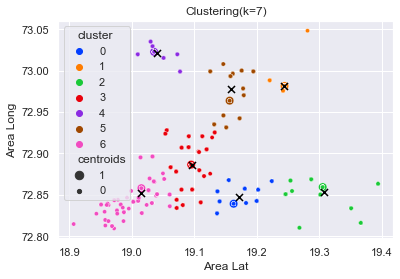

In [23]:
## plot showing the clusters and centroids.
fig, ax = plt.subplots()
sns.scatterplot(x="Area Lat", y="Area Long", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering(k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [ ]:
# Let's have a look at the data for for one of the clusters

In [24]:
df_0 = df[df["cluster"]==0]  # dataframe for cluster 0 data

In [44]:
df_0.head()

,Emp ID,Office InTime,Office OutTime,Area,Area Lat,Area Long,cluster,centroids
10,13,13:00:00,22:00:00,GOREGAON (E),19.155148,72.867855,0,0
14,18,13:00:00,22:00:00,KANDIVALI (W),19.199821,72.842594,0,0
15,19,13:00:00,22:00:00,ANDHERI (W),19.136325,72.827660,0,0
24,28,13:00:00,22:00:00,MALAD (E),19.180873,72.857456,0,0
36,41,13:00:00,22:00:00,MALAD (W),19.182755,72.840154,0,0


In [26]:
df_0["Office InTime"].value_counts()

6:00:00     79
19:00:00    51
18:00:00    51
13:00:00    34
9:00:00     14
15:00:00     8
21:00:00     7
Name: Office InTime, dtype: int64

In [27]:
df_0["Office OutTime"].value_counts()

15:00:00    79
4:00:00     53
3:00:00     49
22:00:00    34
18:00:00    14
0:00:00      8
6:00:00      7
Name: Office OutTime, dtype: int64

In [46]:
df_0[df_0["centroids"]==1] # centroid for cluster 0

,Emp ID,Office InTime,Office OutTime,Area,Area Lat,Area Long,cluster,centroids
55,65,13:00:00,22:00:00,GOREGAON (W),19.162934,72.839241,0,1


# Greedy Algorithm optimization problem

### Assumptions: 
###     1. Average speed of cab in mumbai is 25 Km/hr
###     2. Pickup point is centroid for each cluster

In [29]:
# Now we have 7 clusters with centroids as pick up points 
# Finding the minimum of cabs to complete all trips is now an optimization problem, 
# So we will use the greedy algorithm here

In [30]:
# Hence, let's find the time slots which would require most number of cabs, 
# we would atleast need that many cabs to pick up or drop 

In [31]:
# office in time slots with value counts
df["Office InTime"].value_counts()

# max employee count = 586 at 6:00:00

6:00:00     586
18:00:00    422
19:00:00    282
13:00:00    204
9:00:00     102
21:00:00     46
15:00:00     42
11:00:00      4
Name: Office InTime, dtype: int64

In [32]:
# office out time slots with value counts
df["Office OutTime"].value_counts()

#max employee count = 585 at 15:00:00

15:00:00    585
3:00:00     386
4:00:00     318
22:00:00    204
18:00:00    102
6:00:00      46
0:00:00      42
20:00:00      4
16:00:00      1
Name: Office OutTime, dtype: int64

In [33]:
# calculate the minimum number of cabs required for these max employee slots 
# Since the pickup is from cluster centroids, the calculation should be done as per employee count at each cluster

clusters = df["cluster"].nunique() # clusters count =7
min_cab_req_6am_slot = 0
min_cab_req_15pm_slot = 0

for i in range(clusters):
    print("\n--> cluster: ", i)
    df_c = df[df["cluster"]==i]
    ofc_in_emp_count = len(df_c[df_c["Office InTime"] == "6:00:00"])
    print("\nemployees to be picked up for slot 6am: ", ofc_in_emp_count)
    min_cab_req_6am_slot += math.ceil(ofc_in_emp_count/6) # as each cab can max fit 6 employees
    
    ofc_out_emp_count = len(df_c[df_c["Office OutTime"] == "15:00:00"])
    print("\nemployees to be dropped for slot 15pm: ", ofc_out_emp_count)
    min_cab_req_15pm_slot += math.ceil(ofc_out_emp_count/6) # as each cab can max fit 6 employees
    
    print("\nTotal min cabs required for slot 6am ofc in : ", min_cab_req_6am_slot)
    print("\nTotal min cabs required for slot 15pm ofc out: ", min_cab_req_15pm_slot)
    


--> cluster:  0

employees to be picked up for slot 6am:  79

employees to be dropped for slot 15pm:  79

Total min cabs required for slot 6am ofc in :  14

Total min cabs required for slot 15pm ofc out:  14

--> cluster:  1

employees to be picked up for slot 6am:  58

employees to be dropped for slot 15pm:  58

Total min cabs required for slot 6am ofc in :  24

Total min cabs required for slot 15pm ofc out:  24

--> cluster:  2

employees to be picked up for slot 6am:  69

employees to be dropped for slot 15pm:  69

Total min cabs required for slot 6am ofc in :  36

Total min cabs required for slot 15pm ofc out:  36

--> cluster:  3

employees to be picked up for slot 6am:  126

employees to be dropped for slot 15pm:  126

Total min cabs required for slot 6am ofc in :  57

Total min cabs required for slot 15pm ofc out:  57

--> cluster:  4

employees to be picked up for slot 6am:  27

employees to be dropped for slot 15pm:  27

Total min cabs required for slot 6am ofc in :  62

Tota

In [34]:
# Now since each cab can max work for 12 hrs,
# So if these 101 cabs are to service for 12 hrs covering both these max employee pick up and drop slots i.e 6am and 3pm 
# the cabs would have to start before 6 am and work till after 15 pm to reach ofc in time and drop ppl to there cluster centroid
# say 5am to 17pm, but no ofc to drop point should take more than an hr for our assumption to be correct
# So, lets calculate office to cluster centroids distance and time required for same..assuming avg cab speed is 25 km/hr

In [35]:
# Distance between the office and cluster centroid
def get_distance_and_time_for_cluster(df_c):
    avg_cab_speed = 25 # in Km/hr     
    office_lat = 19.119871
    office_long = 72.864071

    centroid_lat = df_c[df_c["centroids"]==1].iloc[0]["Area Lat"]
    centroid_long = df_c[df_c["centroids"]==1].iloc[0]["Area Long"]

    R = 6373.0     # radius of the earth 

    lat1 = radians(office_lat)
    lon1 = radians(office_long)
    lat2 = radians(centroid_lat)
    lon2 = radians(centroid_long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    cluster_distance = R * c
    cluster_time = cluster_distance / avg_cab_speed
    
    return cluster_distance, cluster_time

for i in range(7):
    print("\n--> cluster: ", i)
    df_c = df[df["cluster"]==i]
    c_dist, c_time = get_distance_and_time_for_cluster(df_c)
    print("\n office distance from cluster centroid: ", c_dist, "kms")
    print("\n time taken to reach office from cluster centroid: ", c_time, "hrs")


--> cluster:  0

 office distance from cluster centroid:  5.4543974883589925 kms

 time taken to reach office from cluster centroid:  0.2181758995343597 hrs

--> cluster:  1

 office distance from cluster centroid:  18.55376332263291 kms

 time taken to reach office from cluster centroid:  0.7421505329053164 hrs

--> cluster:  2

 office distance from cluster centroid:  20.66459198540091 kms

 time taken to reach office from cluster centroid:  0.8265836794160364 hrs

--> cluster:  3

 office distance from cluster centroid:  3.645066216649553 kms

 time taken to reach office from cluster centroid:  0.1458026486659821 hrs

--> cluster:  4

 office distance from cluster centroid:  19.141144435912917 kms

 time taken to reach office from cluster centroid:  0.7656457774365166 hrs

--> cluster:  5

 office distance from cluster centroid:  11.24163901750383 kms

 time taken to reach office from cluster centroid:  0.44966556070015323 hrs

--> cluster:  6

 office distance from cluster centroi

In [36]:
# Now we can observe that the maximum time required to reach office from a cluster centroid is 1hr
# SO, to cover both max employee count ofc_in (6:00:00) and ofc_out (15:00:00) slot, we can form a cab group 1 which works from 5am to 5pm.

# Consequently, time slots covered by cab group1 of 101 cabs, which works from 5am to 5pm will be as below
# ofc_in_slots -> 6:00:00, 9:00:00, 11:00:00, 13:00:00, 15:00:00
# ofc_out_slots -> 6:00:00, 15:00:00, 16:00:00

In [37]:
print(df["Office InTime"].value_counts())
print(df["Office OutTime"].value_counts())

6:00:00     586
18:00:00    422
19:00:00    282
13:00:00    204
9:00:00     102
21:00:00     46
15:00:00     42
11:00:00      4
Name: Office InTime, dtype: int64
15:00:00    585
3:00:00     386
4:00:00     318
22:00:00    204
18:00:00    102
6:00:00      46
0:00:00      42
20:00:00      4
16:00:00      1
Name: Office OutTime, dtype: int64


In [38]:
# Subsequently, as cabs from group1 can only work for 12 hrs ..we will need a group 2 of cabs to serve from 5 pm to 5am

# Time slots covered by cab group2, which works from 5pm to 5am will be as below
# ofc_in_slots -> 18:00:00, 19:00:00, 21:00:00
# ofc_out_slots -> 18:00:00, 20:00:00, 22:00:00, 0:00:00, 3:00:00, 4:00:00

In [39]:
# Now the final task would be to find the minimum cabs required for group2 
# Again we will use the greedy approach by taking the max employee count in these group 2 slots

# From the above slot -> value_counts map , we can see that 
# grp2_ofc_in_slot with max emp count is - "18:00:00" with emp count 422
# grp2_ofc_out_slot with max emp count is - "3:00:00" with emp count 386

# So lets calculate the min cabs req for grp2 using cluster emp counts 

In [40]:
# Grp2 - calculate the minimum number of cabs required for the max employee slots 
# Since the pickup is from cluster centroids, the calculation should be done as per employee count at each cluster

clusters = df["cluster"].nunique()
grp2_min_cab_req_18pm_slot = 0
grp2_min_cab_req_3am_slot = 0

for i in range(clusters):
    print("\n--> cluster: ", i)
    df_c = df[df["cluster"]==i]
    grp2_ofc_in_emp_count = len(df_c[df_c["Office InTime"] == "18:00:00"])
    print("\nemployees to be picked up for slot 18pm: ", grp2_ofc_in_emp_count)
    grp2_min_cab_req_18pm_slot += math.ceil(grp2_ofc_in_emp_count/6) # as each cab can max fit 6 employees
    
    grp2_ofc_out_emp_count = len(df_c[df_c["Office OutTime"] == "3:00:00"])
    print("\nemployees to be dropped for slot 3am: ", grp2_ofc_out_emp_count)
    grp2_min_cab_req_3am_slot += math.ceil(grp2_ofc_out_emp_count/6) # as each cab can max fit 6 employees
    
    print("\nTotal min cabs required for slot 18pm ofc in : ", grp2_min_cab_req_18pm_slot)
    print("\nTotal min cabs required for slot 3am ofc out: ", grp2_min_cab_req_3am_slot)
    


--> cluster:  0

employees to be picked up for slot 18pm:  51

employees to be dropped for slot 3am:  49

Total min cabs required for slot 18pm ofc in :  9

Total min cabs required for slot 3am ofc out:  9

--> cluster:  1

employees to be picked up for slot 18pm:  53

employees to be dropped for slot 3am:  47

Total min cabs required for slot 18pm ofc in :  18

Total min cabs required for slot 3am ofc out:  17

--> cluster:  2

employees to be picked up for slot 18pm:  90

employees to be dropped for slot 3am:  82

Total min cabs required for slot 18pm ofc in :  33

Total min cabs required for slot 3am ofc out:  31

--> cluster:  3

employees to be picked up for slot 18pm:  95

employees to be dropped for slot 3am:  85

Total min cabs required for slot 18pm ofc in :  49

Total min cabs required for slot 3am ofc out:  46

--> cluster:  4

employees to be picked up for slot 18pm:  11

employees to be dropped for slot 3am:  10

Total min cabs required for slot 18pm ofc in :  51

Total m

In [41]:
# So for group 2 minimum number of required cabs is 72 
# And total minimum number of cabs req for complete service is 101 (grp1)+ 72(grp2) = 173

minimum_no_of_cabs_req_to_comp_all_trips = \
max(min_cab_req_6am_slot, min_cab_req_15pm_slot) + max(grp2_min_cab_req_18pm_slot, grp2_min_cab_req_3am_slot)

print("\n Minimum number of cabs req to complete all trips: ", minimum_no_of_cabs_req_to_comp_all_trips)


 Minimum number of cabs req to complete all trips:  173


In [42]:
# Greedy algorithm Summary

# Form a 12 hour cab group 1 such that it includes max employee counts office in and office out slots
# Now form a 12 hour cab group 2 which includes the next set of max employee counts office in and office out slots
# The two 12 hours cab group should satisy all trips.

print(df["Office InTime"].value_counts())
print(df["Office OutTime"].value_counts())


6:00:00     586
18:00:00    422
19:00:00    282
13:00:00    204
9:00:00     102
21:00:00     46
15:00:00     42
11:00:00      4
Name: Office InTime, dtype: int64
15:00:00    585
3:00:00     386
4:00:00     318
22:00:00    204
18:00:00    102
6:00:00      46
0:00:00      42
20:00:00      4
16:00:00      1
Name: Office OutTime, dtype: int64


In [43]:
# we take first two max values i.e 586 and 585 time slots in cab group1 as it fall within 12 hours,  5am to 5pm
# we take the next two max values 422 and 386 time slots in cab group 2 as it falls within 12 hours, 5pm to 5am 

# The two 12 hours cab group satisy all trips so our problem is solved.
# No of cabs required = 173